In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


/home/marcello/anaconda3/lib/python3.9/site-packages/numpy/_core/getlimits.py:545: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
R = 1 # team 1
G = 2 # team 2
B = 3 # team 3
E = 0 # empty
V = 4 # blocked / void

N = 64
THR = 0.9
p = [0.2,0.2,0.2, 0.2,0.0] # prob. distr. for R G B E and B
p = np.array(p) / np.sum(p) # normalized

s = 2 # average (and std) of the distributions of step sizes


# define color map 
color_map = {R: np.array([234,  67,  53]), # red
             G: np.array([ 52, 168,  83]), # green
             B: np.array([ 66, 133, 244]), # blue
             E: np.array([200, 215, 244]), # white
             V: np.array([  0,   0,   0])} # black

max_evolutions = 4

In [3]:
def sameness( grid, me, i, j ):
    
    up = (i+1) % N
    dw = (i-1) % N
    lx = (j+1) % N
    rx = (j-1) % N

    neigh = np.array([
        grid[dw,lx],
        grid[dw,j ],
        grid[dw,rx],
        grid[i ,lx],
        grid[i ,rx],
        grid[up,lx],
        grid[up,j ],
        grid[up,rx]])

    Rness  = np.sum( neigh == R )
    Gness  = np.sum( neigh == G )
    Bness  = np.sum( neigh == B )
    RGBness = Rness + Gness + Bness

    my_sameness = 0
    if me == R and Rness != 0 :
        my_sameness = (Rness-Gness-Bness) / ( RGBness )
    if me == G and Gness != 0 :
        my_sameness = (Gness-Rness-Bness) / ( RGBness )
    if me == B and Bness != 0 :
        my_sameness = (Bness-Rness-Gness) / ( RGBness )
    return my_sameness


def show(grid, color_map):
    
    fig = plt.figure(figsize=(10,10))
    
    data_3d = np.ndarray(shape=(N,N, 3), dtype=int)
    for i in range(N):
        for j in range(N):
            data_3d[i][j] = color_map[grid[i][j]]
    c = Counter(grid.flatten()[:])
    print(c)
#    plt.imshow(data_3d)
    plt.imshow(grid)
    plt.show()

    S = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            S[i,j] = sameness( grid, grid[i,j], i,j)

    plt.imshow(S)
    plt.show()

    plt.hist(S.flatten(), bins=N)
    plt.show()

Counter({np.int64(3): 1074, np.int64(1): 1038, np.int64(0): 1002, np.int64(2): 982})


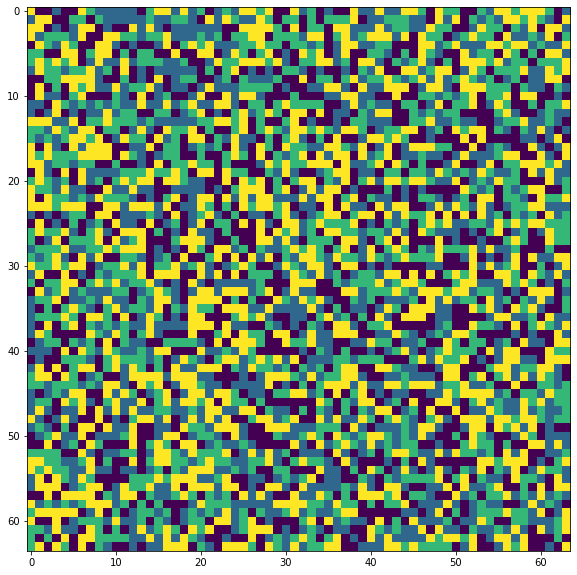

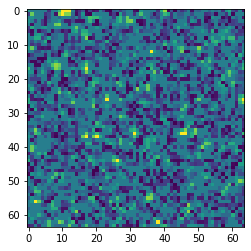

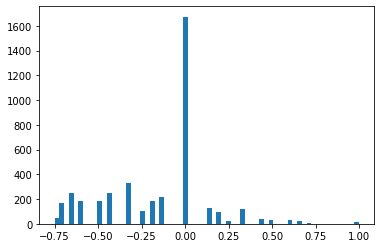

Counter({np.int64(3): 1074, np.int64(1): 1038, np.int64(0): 1002, np.int64(2): 982})


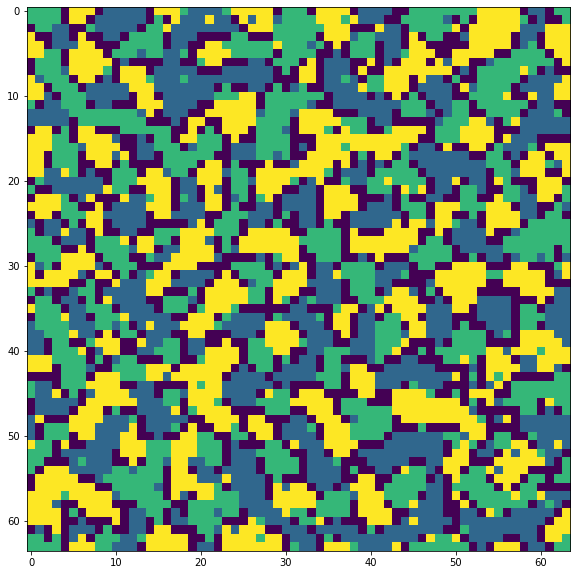

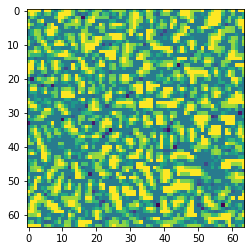

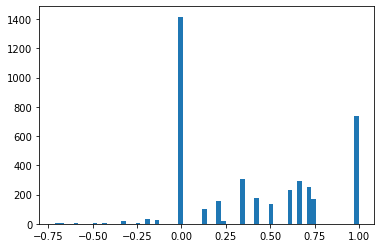

Counter({np.int64(3): 1074, np.int64(1): 1038, np.int64(0): 1002, np.int64(2): 982})


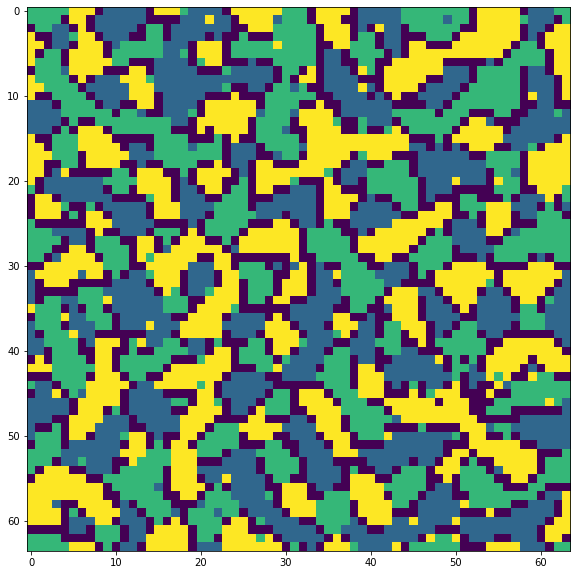

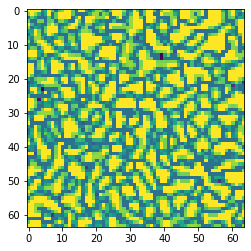

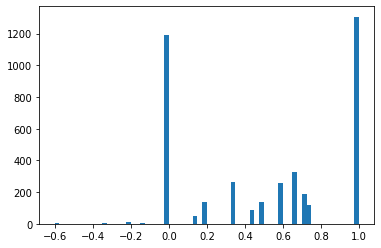

Counter({np.int64(3): 1074, np.int64(1): 1038, np.int64(0): 1002, np.int64(2): 982})


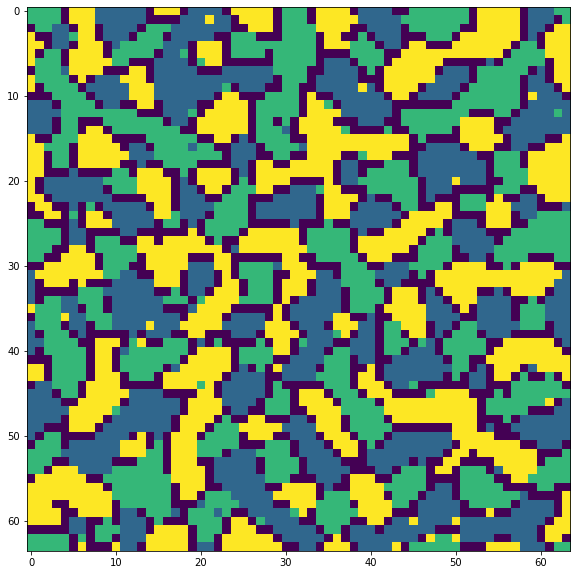

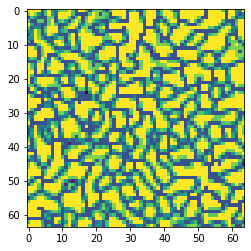

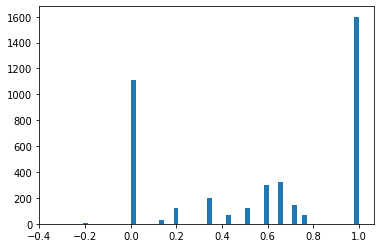

Counter({np.int64(3): 1074, np.int64(1): 1038, np.int64(0): 1002, np.int64(2): 982})


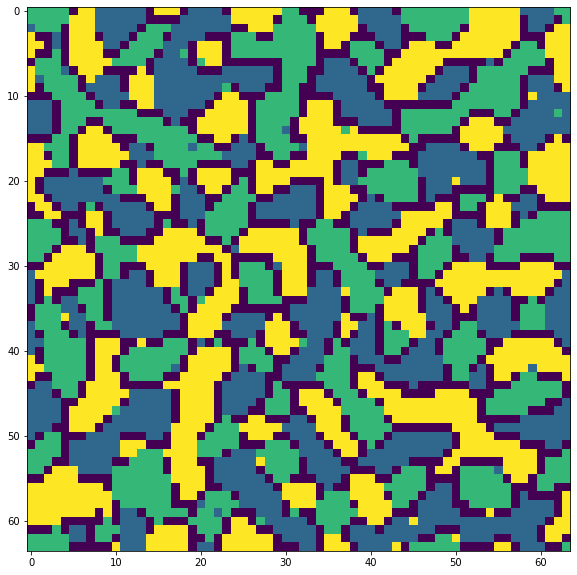

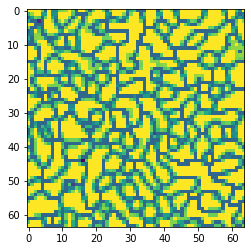

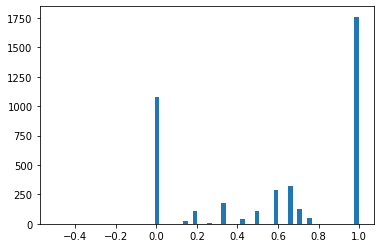

In [4]:

# start
grid = np.zeros((N,N), int)
for i in range(N):
    for j in range(N):
        r = np.random.choice([R,G,B,E,V], 1, p=p)[0]
        grid[i,j] = r
show(grid, color_map)

rng = np.random.default_rng()

# step
evolutions = 0
while True: 
    swapped = 0
    for step in range(N):
        for t in range(N*N):
            i = np.random.choice(N)
            j = np.random.choice(N)
            me = grid[i,j]
            
            if me in [R,G,B]:
                my_sameness = sameness( grid, me, i, j )
                if my_sameness < THR:
                    dx = np.random.choice([-1,0,1]) * rng.poisson(lam=s)
                    dy = np.random.choice([-1,0,1]) * rng.poisson(lam=s)
                    ni = (i+dx) % N
                    nj = (j+dy) % N
                    if grid[ni,nj] == E and sameness( grid, me, ni, nj ) > my_sameness:
                        grid[i,j] = E
                        grid[ni,nj] = me
                        swapped += 1

    show(grid, color_map)
    
    evolutions += 1
    if swapped == 0 or evolutions >= max_evolutions:
        break
